# Module 2
### Ruchir Namjoshi

### Q1) Edge Detection

In [1]:
import numpy as np
from scipy import ndimage
import cv2 as cv2

In [2]:
cap = cv2.VideoCapture("output.mp4")
frames_dict = {}
count = 0
while cap.read()[0]:
    frames_dict[count] = cap.read()[1]  # storing alll the frames of the video
    count += 1
#print(frames_dict)
frame = frames_dict[10]

[ WARN:0@0.068] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@0.068] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin0 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@0.068] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@0.068] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/c

In [3]:
def canny_edge_manual(image, roi, patch_center):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define the ROI and extract the 5x5 patch
    x, y, w, h = roi
    px, py = patch_center
    patch_size = 5
    roi_gray = gray[y:y+h, x:x+w]
    patch = roi_gray[py-patch_size//2:py+patch_size//2+1, px-patch_size//2:px+patch_size//2+1]

    # Apply Gaussian blur to the patch
    blurred_patch = cv2.GaussianBlur(patch, (5, 5), 1.4)
    #blurred_patch = patch

    # Compute gradients using Sobel operators
    sobelx = cv2.Sobel(blurred_patch, cv2.CV_64F, 1, 0, ksize=1)
    sobely = cv2.Sobel(blurred_patch, cv2.CV_64F, 0, 1, ksize=1)
    magnitude = np.hypot(sobelx, sobely)

    # Normalize the magnitude
    magnitude = magnitude / magnitude.max() * 255
    

    # Apply a simple threshold to detect edges
    threshold_value = 220  # Lower threshold value to ensure sensitivity
    edges = np.zeros_like(magnitude)
    edges[magnitude > threshold_value] = 255

    # Compare with OpenCV's Canny (on the same patch for fair comparison)
    edges_opencv = cv2.Canny(blurred_patch, 100, 200)

    return edges, edges_opencv


In [4]:
# Load the image
image = frame

# Define your ROI coordinates and size
x, y, width, height = 1050, 250, 550, 550  # Example values

# Extract the ROI from the image
roi = image[y:y+height, x:x+width]

# Display the ROI
cv2.imshow('ROI', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:

patch_size = 5
px, py = 250,180  # Example center point

# Extract the 5x5 patch
patch = roi[py-patch_size//2:py+patch_size//2+1, px-patch_size//2:px+patch_size//2+1]

# Display the patch
cv2.imshow('Patch', patch)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# Usage example
#image = cv2.imread('your_image.jpg')  # Load your image
roi = (350, 450, 550, 550)  # Example ROI, adjust based on your image
patch_center = (250, 306)  # Center of the patch within the ROI, adjust as needed

edges_manual, edges_opencv = canny_edge_manual(frame, roi, patch_center)




### Display the results

In [44]:
cv2.imshow('Manual Canny Edges', edges_manual)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [43]:
cv2.imshow('OpenCV Canny Edges', edges_opencv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Displaying the matrix for manual as well as pre-built method

In [9]:
edges_manual

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255., 255.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [10]:
edges_opencv


array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

### Q2) Corner Detection

In [17]:
# Load the image
image = frame

# Define ROI coordinates and size
x, y, width, height = 1050, 250, 550, 550  # Example values

# Extract the ROI from the image
roi = image[y:y+height, x:x+width]

# Display the ROI
cv.imshow('ROI', roi)
cv.waitKey(0)
cv.destroyAllWindows()

In [18]:
patch_size = 5
px, py = 244,180  # Example center point

# Extract the 5x5 patch
patch = roi[py-patch_size//2:py+patch_size//2+1, px-patch_size//2:px+patch_size//2+1]

# Display the patch
cv.imshow('Patch', patch)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
import cv2 as cv
import numpy as np

def manual_harris_corners(image, roi, patch_center):
    # Convert the image to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Extract the 5x5 patch from the ROI
    x, y, w, h = roi
    px, py = patch_center
    patch = gray[y:y+h, x:x+w][py-2:py+3, px-2:px+3]

    # Convert patch to float32
    patch = np.float32(patch)

    # Calculate gradient matrices
    Ix = cv.Sobel(patch, cv.CV_64F, 1, 0, ksize=3)
    Iy = cv.Sobel(patch, cv.CV_64F, 0, 1, ksize=3)

    Ixx = Ix ** 2
    Ixy = Ix * Iy
    Iyy = Iy ** 2

    # Apply Gaussian filter to smooth the gradient matrices
    Ixx = cv.GaussianBlur(Ixx, (3, 3), sigmaX=1)
    Ixy = cv.GaussianBlur(Ixy, (3, 3), sigmaX=1)
    Iyy = cv.GaussianBlur(Iyy, (3, 3), sigmaX=1)

    # Calculate Harris response for each pixel in the patch
    k = 0.015
    detM = Ixx * Iyy - Ixy ** 2
    traceM = Ixx + Iyy
    R = detM - k * traceM ** 2

    # Threshold to identify corners
    threshold = 0.001 * R.max()
    corner_response = np.zeros_like(R)
    corner_response[R > threshold] = 255

    # Use OpenCV's Harris corner detection for comparison
    roi_gray = gray[y:y+h, x:x+w]
    dist = cv.cornerHarris(roi_gray, 2, 3, 0.04)
    dist = cv.dilate(dist, None)
    corners_opencv = np.zeros_like(dist)
    corners_opencv[dist > 0.01 * dist.max()] = 255

    return corner_response, corners_opencv[py-2:py+3, px-2:px+3]


In [12]:


roi = (1050, 250, 550, 550)  # ROI from the image
patch_center = (245,181)  # Center of the patch within the ROI

corner_response, corners_opencv = manual_harris_corners(frame, roi, patch_center)


### Displaying the results

In [46]:
cv.imshow('Manual Corners', corner_response)
cv.waitKey(0)
cv.destroyAllWindows()

In [45]:
cv.imshow('OpenCV Harris corners', corners_opencv)
cv.waitKey(0)
cv.destroyAllWindows()

# Displaying the matrix for manual as well as pre-built method

In [15]:
corner_response

array([[255., 255., 255., 255.,   0.],
       [255., 255., 255., 255.,   0.],
       [255., 255., 255., 255.,   0.],
       [255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [16]:
corners_opencv

array([[255., 255., 255., 255.,   0.],
       [255., 255., 255., 255.,   0.],
       [255., 255., 255., 255.,   0.],
       [255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.]], dtype=float32)

### Q3.a) Super patch, matching keypoints and SSD.

In [57]:
def extract_frames(video_path, start_frame, end_frame):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_idx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx == start_frame or frame_idx == end_frame:
            frames.append(frame)
        
        if len(frames) == 2:
            break

        frame_idx += 1

    cap.release()
    return frames[0], frames[1]



In [58]:
def compute_sift_descriptors(image, keypoints):
    sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.03, edgeThreshold=8)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors



In [59]:
def match_keypoints(descriptors1, descriptors2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

In [60]:
def find_super_patches(image, num_patches=1, patch_size=64):  # Increased patch size
    sift = cv2.SIFT_create(edgeThreshold=5)  # Reduced edge threshold
    keypoints = sift.detect(image, None)

    super_patches = [cv2.KeyPoint(k.pt[0], k.pt[1], patch_size) for k in keypoints[:num_patches]]
    return super_patches



In [61]:
def calculate_ssd(descriptor1, descriptor2):
    return np.sum((descriptor1 - descriptor2) ** 2)

In [62]:
# Parameters
video_path = 'output.mp4'
fps = 20 
start_frame = 1
end_frame = start_frame + 6 * fps



In [63]:
# Extract frames
frame1, frame2 = extract_frames(video_path, start_frame, end_frame)



[ WARN:0@49603.274] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@49603.275] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin3 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@49603.275] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@49603.275] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modul

In [64]:
# Find super patches (keypoints with larger size)
super_patches_frame1 = find_super_patches(frame1, num_patches=1,patch_size=64)
super_patches_frame2 = find_super_patches(frame2, num_patches=1,patch_size=64)



In [65]:
# Compute SIFT descriptors for the super patches
keypoints1, descriptors1  = compute_sift_descriptors(frame1, super_patches_frame1)
keypoints2, descriptors2  = compute_sift_descriptors(frame2, super_patches_frame2)



In [66]:
matches = match_keypoints(descriptors1, descriptors2)

In [67]:
if matches:
    best_match = matches[0]
    ssd = calculate_ssd(descriptors1[best_match.queryIdx], descriptors2[best_match.trainIdx])
    print(f"SSD for the best match: {ssd}")
else:
    print("No matches found")


SSD for the best match: 837.0


In [28]:
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)


### Q3.b) Homography matrix

In [29]:


# Ensuring descriptors are in the correct type
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)

# Initialize FLANN parameters and matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Increase checks for better accuracy

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Ensure both descriptors are non-empty and have more than one descriptor
if descriptors1 is not None and descriptors2 is not None :
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test with additional checks
    good_matches = []
    for match in matches:
        if len(match) == 2:  # Ensure there are 2 matches to unpack
            m, n = match
            if m.distance < 0.7 * n.distance:  # Adjusted threshold
                good_matches.append(m)
    
    if len(good_matches) >= 4:
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        # Compute the inverse of the Homography matrix
        if H is not None:
            H_inv = np.linalg.inv(H)
            print(f"Homography matrix:\n{H}")
            print(f"Inverse Homography matrix:\n{H_inv}")
        else:
            print("Homography matrix could not be computed.")
        
    else:
        print("Not enough good matches were found.")
else:
    print("One or both of the descriptor sets are empty or contain only one descriptor.")


Homography matrix:
[[ 1.15833834e+00 -1.21988193e-01 -5.68751894e+02]
 [ 5.31652895e-02  9.94244571e-01  6.71452143e+01]
 [ 6.63134866e-05 -9.66056599e-05  1.00000000e+00]]
Inverse Homography matrix:
[[ 8.30105033e-01  1.46765534e-01  4.62269206e+02]
 [-4.04070763e-02  9.92125240e-01 -8.95980631e+01]
 [-5.89507112e-05  8.61123793e-05  9.60689637e-01]]


### Q4) Integral Image

In [ ]:

from matplotlib import pyplot as plt


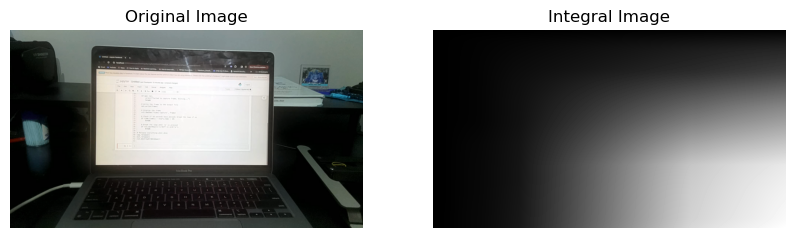

In [31]:
gray_clr = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
height, width = gray_clr.shape

integral_image = np.zeros((height, width), dtype=np.uint32)

# Compute the integral image
for i in range(height):
    for j in range(width):
        integral_image[i, j] = gray_clr[i, j]
        if i > 0: integral_image[i, j] += integral_image[i-1, j]
        if j > 0: integral_image[i, j] += integral_image[i, j-1]
        if i > 0 and j > 0: integral_image[i, j] -= integral_image[i-1, j-1]

# Display the original and the integral image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(frame1)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(integral_image, cmap='gray')
ax[1].set_title("Integral Image")
ax[1].axis('off')

plt.show()


## Integral Image in real time

In [38]:


# Function to compute integral image
def compute_integral_image(image):
    # Initialize the integral image with an extra row and column filled with zeros
    integral_image = np.zeros((image.shape[0] + 1, image.shape[1] + 1), dtype=np.uint64)

    # Compute the integral image
    for y in range(1, integral_image.shape[0]):
        for x in range(1, integral_image.shape[1]):
            integral_image[y, x] = image[y-1, x-1] + integral_image[y-1, x] + integral_image[y, x-1] - integral_image[y-1, x-1]

    # Remove the first row and column to get the final integral image
    return integral_image[1:, 1:]

# Capture video from the default camera
cap = cv2.VideoCapture(0)

while True:
    # Read a new frame
    ret, frame = cap.read()

    # Check if frame is not empty
    if not ret:
        break

    # Convert frame to grayscale because the integral image typically works on single-channel images
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the integral image for the grayscale frame
    integral_image = compute_integral_image(gray_frame)

    # Normalize and convert to uint8 for visualization
    integral_image_normalized = cv2.normalize(integral_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Resize original and integral images to the same height for horizontal stacking
    height = max(frame.shape[0], integral_image_normalized.shape[0])
    frame_resized = cv2.resize(frame, (int(frame.shape[1] * height / frame.shape[0]), height))
    
    # Convert the grayscale integral image to a 3-channel image
    integral_image_3_channel = cv2.cvtColor(integral_image_normalized, cv2.COLOR_GRAY2BGR)
    
    integral_image_resized = cv2.resize(integral_image_3_channel, (int(integral_image_normalized.shape[1] * height / integral_image_normalized.shape[0]), height))
    
    # Combine the original frame and the integral image horizontally
    combined_image = np.hstack((frame_resized, integral_image_resized))
    
    # Display the combined frame
    cv2.imshow('Combined Original and Integral Image Feed', combined_image)
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close all windows
cap.release()
cv2.destroyAllWindows()


[ WARN:0@1481.091] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


### Q5) Panorama

In [7]:


def find_keypoints_and_descriptors(image):
    """
    Find keypoints and descriptors of the image using SIFT.
    """
    sift = cv2.SIFT_create()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

def match_features(des1, des2):
    """
    Match features between two sets of descriptors using FLANN based matcher.
    """
    index_params = dict(algorithm=1, trees=5)  # FLANN_INDEX_KDTREE
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    return matches

def filter_matches(matches, ratio=0.75):
    """
    Apply Lowe's ratio test to filter out weak matches.
    """
    good_matches = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)
    return good_matches

def find_homography(kp1, kp2, matches):
    """
    Compute homography matrix from matched features.
    """
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return M, mask

def stitch_images(img1, img2, M):
    """
    Stitch two images using the provided homography matrix.
    """
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    corners_img1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    corners_img1_transformed = cv2.perspectiveTransform(corners_img1, M)
    corners_img2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    
    all_corners = np.concatenate((corners_img1_transformed, corners_img2), axis=0)
    [x_min, y_min] = np.int32(all_corners.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(all_corners.max(axis=0).ravel() + 0.5)
    
    translation_dist = [-x_min, -y_min]
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])
    
    output_img = cv2.warpPerspective(img1, H_translation.dot(M), (x_max-x_min, y_max-y_min))
    output_img[translation_dist[1]:translation_dist[1]+h2, translation_dist[0]:translation_dist[0]+w2] = img2
    
    return output_img

# Main stitching logic
cap = cv2.VideoCapture('IMG_0194.mp4')
frames = []

# Read all frames from the video
ret, frame = cap.read()
while ret:
    frames.append(frame)
    ret, frame = cap.read()
cap.release()

panorama = frames[0]
kp_last, des_last = find_keypoints_and_descriptors(frames[0])

for i in range(1, len(frames)):
    
    if(i%7==0):
        kp_current, des_current = find_keypoints_and_descriptors(frames[i])
        matches = match_features(des_last, des_current)
        good_matches = filter_matches(matches)

        if len(good_matches) > 10:
            M, _ = find_homography(kp_last, kp_current, good_matches)
            panorama = stitch_images(panorama, frames[i], M)
            #panorama1 = cv2.resize(panorama, (1280,860))
            cv2.imshow('Panoramic View', panorama)

            # Update last_frame
            last_frame = panorama
            kp_last, des_last = find_keypoints_and_descriptors(last_frame)
        else:
            print("Not enough matches found - {}/{}".format(len(good_matches), 10))

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()





[ WARN:0@1126.666] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@1126.666] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin3 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@1126.667] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@1126.667] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/v

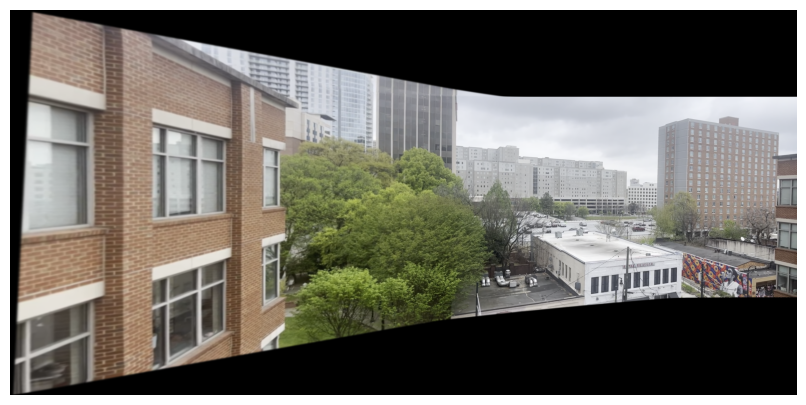

In [8]:
# Display the final panorama
from matplotlib import pyplot as plt
panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 5))
plt.imshow(panorama_rgb)
plt.axis('off')
plt.show()